### Parcialito 3 - Federico del Mazo - 100029

#### Ejercicio 1

In [1]:
jurado1 = ['B', 'C', 'D', 'A']
jurado2 = ['C', 'D', 'A', 'B']
jurado3 = ['D', 'A', 'B', 'C']

orden = ['A', 'B', 'C', 'D']

In [2]:
def versus(jurados, a, b):
    victorias = sum([jurado.index(a) < jurado.index(b) for jurado in jurados])
    ganador = a if victorias >= len(jurados) / 2 else b
    print(f"{a} vs {b} => gana {ganador} con {victorias}/{len(jurados)}")
    return ganador

def eliminaciones_sucesivas(jurados, orden):
    cancha = orden[0] # porque el ganador queda en cancha
                      # se entiende?
                      # jaja
    for candidato in orden:
        if candidato == cancha:
            continue
        cancha = versus(jurados, cancha, candidato)
    return cancha
        
eliminaciones_sucesivas([jurado1, jurado2, jurado3], orden)

A vs B => gana A con 2/3
A vs C => gana C con 1/3
C vs D => gana C con 2/3


'C'

In [3]:
def borda_rule(jurados, candidatos):
    pt = []
    for candidato in candidatos:
        puntos = sum([list(reversed(jurado)).index(candidato) for jurado in jurados])
        print(f"{candidato} tiene {puntos} puntos")
        pt.append((puntos, candidato))
    return max(pt)[1]
        
borda_rule([jurado1, jurado2, jurado3], orden)

A tiene 3 puntos
B tiene 4 puntos
C tiene 5 puntos
D tiene 6 puntos


'D'

c. Suponé que estás a cargo de definir las reglas/formato de la votación, y sos un miembro corrupto que desea que si
o si gane la alternativa A (te asegura favores si logra ganar la elección). Definir (si existe) un sistema de votación
en el cual A resulte ganador de la elección. En caso de no existir, explicar por qué. ¿Cuál propiedad deseable de
los sistemas de votación no se está cumpliendo si, efectivamente, ganara A?

#### Ejercicio 2

Considerando el modelo de cascadas de información visto en clase, supongamos que hay una nueva tecnología que los
individuos pueden optar por aceptar o rechazar. Supongamos que cada uno que acepta la tecnología recibe una ganancia
positiva o negativa (sin conocerla a priori). Estos valores son aleatorios para cada nodo, y si la tecnología es “Buena”,
entonces el promedio será positivo, y si la tecnología es “Mala” el promedio será negativo (esta información es conocida
por los individuos). Quienes rechacen la tecnología reciben ganancia 0. En este modelo, cuando a un individuo le toca
elegir si acepta o rechaza la nueva tecnología, recibe la información de las ganancias de todos los que vinieron antes.
a. Supongamos que esta nueva tecnología es, en realidad, “Mala”. ¿Cómo afecta esta nueva información (qué ganancia
tuvo cada uno de los que vinieron antes) a la potencial formación de una cascada para que persista la nueva
tecnología? (No es necesario dar una demostración, simplemente argumentar)
b. Supongamos que esta nueva tecnología es, en realidad, “Buena”. ¿Puede surgir una cascada de rechazo de esta
nueva tecnología?

#### Ejercicio 3

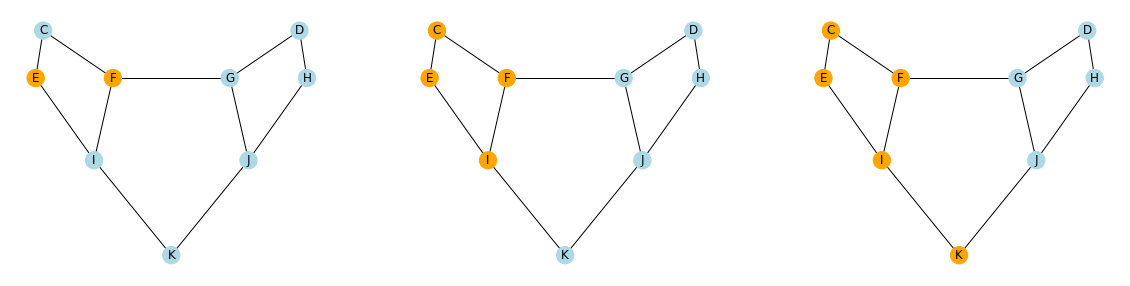

In [76]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation

diffusion_G = nx.Graph()
diffusion_G.add_nodes_from(['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
diffusion_G.add_edges_from([('C', 'E'), ('C', 'F'), ('D', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'I'), ('F', 'G'),
                            ('G', 'J'), ('H', 'J'), ('I', 'K'), ('K', 'J')])

# Vamos a usar el atributo Active para referirnos a que el comportamiento paso de 'B' a 'A'
#   active undefined ==> B ==> Celeste
#   active = true    ==> A ==> Naranja

# E y F son early adopters
diffusion_G.nodes['E']['active'] = True
diffusion_G.nodes['F']['active'] = True

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
ax = axes.flatten()

def update(old_G):
    G = old_G.copy()
    to_activate = [] # We want to update all nodes in batch instead of in place, 
                     # to simulate a whole new step in the diffusion
    for n in G.nodes:
        neighbors = list(nx.neighbors(G, n))
        active_neighbors = [n for n in neighbors if G.nodes[n].get('active')]
        if len(active_neighbors) >= (len(neighbors) / 2): 
            to_activate.append(n)
    for n in to_activate:
        G.nodes[n]['active'] = True
    return G
    
def draw(G, ax):
    node_color=['orange' if n[1] else 'lightblue' for n in G.nodes.data('active')]
    nx.draw_networkx(G, node_color=node_color, pos=nx.spectral_layout(G), ax=ax)

i = 0
while True:
    draw(diffusion_G, ax[i])    
    ax[i].set_axis_off()
    next_G = update(diffusion_G)
    if next_G.nodes(data=True) == diffusion_G.nodes(data=True):
        break
    diffusion_G = next_G
    i += 1

plt.show()

Explicar a qué se debe que el comportamiento A no se propaga a través de toda la red en el escenario del punto
(a). ¿Qué característica de la red lo impide? (responder a esta pregunta no apuntando a nodos particulares sino a
presencias de ciertas características) ¿Dónde más tendría que haber otro early adopter de A sí o sí para que el
comportamiento se propague a través de toda la red?

#### Ejercicio 4

In [92]:
# Robando código del ejercicio 5 del parcialito 1...
import math

def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

n_nodes = 1000
n_edges = 2000

total_possible_edges = nCr(n_nodes, 2)
erdos = nx.erdos_renyi_graph(n_nodes, n_edges / total_possible_edges)
barabara = nx.barabasi_albert_graph(n_nodes, n_edges // n_nodes)

grafos = {
    "Erdös-Rényi": erdos,
    "Barabási-Albert": barabara
}

for k,v in grafos.items():
    print(f"{k}: {v}")

Erdös-Rényi: Graph with 1000 nodes and 2032 edges
Barabási-Albert: Graph with 1000 nodes and 1996 edges


In [94]:
# https://ndlib.readthedocs.io/en/latest/tutorial.html
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

model = ep.SIRModel(erdos)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.01)
cfg.add_model_parameter('gamma', 0.005)
cfg.add_model_parameter("infected", "RANDOM NODE")
model.set_initial_status(cfg)

iterations = model.iteration_bunch(200)

/home/delmazo/.local/lib/python3.10/site-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


#### Ejercicio 5

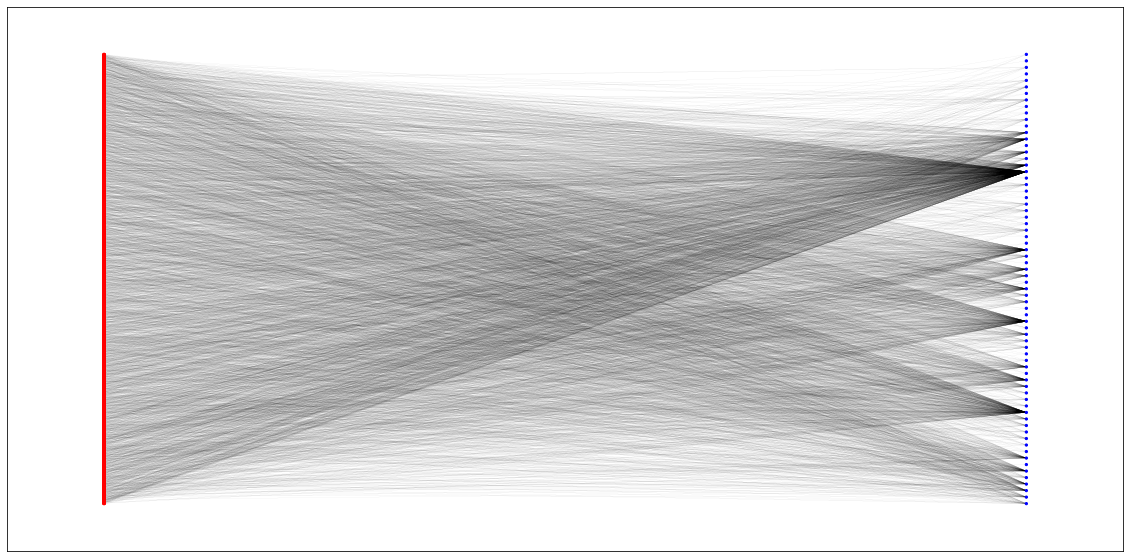

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite


def create_bipartite(file):
    df = pd.read_csv(file, header=0, names=["user", "product", "weight", "_timestamp"])
    df['user'] = 'u_' + df['user'].astype(str)
    df['product'] = 'p_' + df['product'].astype(str)

    G = nx.Graph()
    G.add_nodes_from(df_sample['user'], bipartite=0, color='red')
    G.add_nodes_from(df_sample['product'], bipartite=1, color='blue')
    G.add_weighted_edges_from(list(df[['user','product','weight']].to_records(index=False)))

    # Our df may be disconnected (at least when working with a sample)
    # let's keep the biggest bipartite graph we can get
    G.remove_nodes_from(G.nodes - max(nx.connected_components(G), key=len))


# Before working on the full dataset, let's draw a sample of what we are building
# (At least to show we are working with a bipartite graph!)
G_sample = create_bipartite(f'./data/ratings-electronics-sample.csv')
plt.figure(figsize=(20,10))
nx.draw_networkx(G_sample,
                 node_size=5,
                 node_color=[n[1] for n in G_sample.nodes.data('color')],
                 width=0.02, 
                 pos=nx.bipartite_layout(G_sample, nx.bipartite.sets(G_sample)[0]),
                 with_labels=False)

In [23]:
network_name = 'ratings-electronics-full'
G = create_bipartite(f'./data/{network_name}.csv')
print(G)

# We pickle it for rev2
nx.write_gpickle(G, f"./data/{network_name}_network.pkl")

Graph with 4523295 nodes and 7734581 edges


In [5]:
# https://github.com/horizonly/Rev2-model
# Modificado fuertemente (leer el diff del archivo!)

# Como es un script y no un módulo, tengo que usar un subprocess...
import subprocess

# python rev2code.py [network_name] [a1] [a2] [b1] [b2] [r1] [r2] [r3]
subprocess.call(['python3', './rev2code.py', network_name, '1', '1', '1', '1', '1', '1', '1'])

# el enunciado pide utilizar gamma1=gamma2=0.5, pero los del paper usan ints para los parametros y 3 gammas
# yo prefiero usar ese código a escribirlo a mano (para serle más fiel al algoritmo!)
# lo que hacen los del paper es parameter tuning entre 0 y 2, 
#   pero como acá no estoy seguro de que estoy optimizando, 
#   porque no tengo contra que comparar, 
#   pongo directo todo en 1, que es un valor razonable.
#
# perdón por desviarme del enunciado

Loading ratings-electronics-full network
ratings-electronics-full network has 4523295 nodes and 7734581 edges
-----------------
Epoch number 0 with du = 0.000000, dp = 0.000000, dr = 0.000000, for (1,1,1,1,1,1,1)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 1 with du = 841390.861100, dp = 0.000000, dr = 3887761.666436, for (1,1,1,1,1,1,1)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 2 with du = 398033.271604, dp = 0.000000, dr = 734993.314829, for (1,1,1,1,1,1,1)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 3 with du = 175809.892212, dp = 2000.736912, dr = 284732.380023, for (1,1,1,1,1,1,1)
Updating goodness of product
Updating fairness of ratings
updating fairness of users
-----------------
Epoch number 4 with du = 77207.486990, dp = 4477.009180, dr = 113891.198443, for (1,1,

0

In [37]:
# Let's load our results back and show some node/edge samples
G = nx.read_gpickle(f"./results/{network_name}_network.pkl")
print(G)
print()
for u in list(nx.bipartite.sets(G)[0])[:3]:
    print(u, G.nodes(data=True)[u])
print()
for p in list(nx.bipartite.sets(G)[1])[:3]:
    print(p, G.nodes(data=True)[p])
print()
for e in list(G.edges(data=True))[:3]:
    print(e)

Graph with 4523295 nodes and 7734581 edges

u_AOG3JEY0Q47T7 {'bipartite': 0, 'color': 'red', 'fairness': 0.600000000004835}
u_A2T60KSHRZNDM9 {'bipartite': 0, 'color': 'red', 'fairness': 0.4142857142893406}
u_A116HQXNQV71OP {'bipartite': 0, 'color': 'red', 'fairness': 0.48000000000435156}

p_B004W70OHG {'bipartite': 1, 'color': 'blue', 'goodness': 1.0}
p_B000YHR59S {'bipartite': 1, 'color': 'blue', 'goodness': 0.7176470588561985}
p_B003ZFPEJY {'bipartite': 1, 'color': 'blue', 'goodness': 1.0}

('u_A2CX7LUOHB2NDG', 'p_0321732944', {'weight': 5.0, 'fairness': 0.09186046514755312})
('u_A2CX7LUOHB2NDG', 'p_B000W3LJ6Y', {'weight': 5.0, 'fairness': 0.1218992248182258})
('u_A2CX7LUOHB2NDG', 'p_B001EYU79A', {'weight': 5.0, 'fairness': 0.09186046514755312})


In [36]:
def filter_users(n_reviews, fairness_fn):
    user_nodes = nx.bipartite.sets(G)[0]
    users_with_n_reviews = filter(lambda n: G.degree[n] >= n_reviews, user_nodes)
    users = filter(lambda n: fairness_fn(G.nodes(data=True)[n]['fairness']), users_with_n_reviews)
    return list(users)

maliciosos = filter_users(5, lambda x: x <= 0.2)
print(f"Hay {len(maliciosos)} usuarios maliciosos, entre ellos: {maliciosos[:3]}")
      
extremadamente_justos = filter_users(10, lambda x: x >= 0.9)
print(f"Hay {len(extremadamente_justos)} usuarios extremadamente justos, entre ellos: {extremadamente_justos[:3]}")

Hay 12679 usuarios maliciosos, entre ellos: ['u_A1MGU9OFE5Z3FL', 'u_A2HUAYU4TH6GYJ', 'u_A3GK1O5S6188AJ']
Hay 13 usuarios extremadamente justos, entre ellos: ['u_A1G1AFIMEVETKK', 'u_A2ZLM4XVOZ7AO2', 'u_A2WDSLOLY2QBI7']
